# Customer Churn Analysis & Prediction

This notebook performs exploratory data analysis (EDA) and builds a machine learning model to predict customer churn for a telecom company.


### Importing Libraries and Loading Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r"C:\Users\Bhavesh\OneDrive - Shri Vile Parle Kelavani Mandal\Documents\Data_Analyst_Projects\Capstone Projects\ecommerce-churn-capstone\data\Telco-Customer-Churn.csv")
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [4]:
df.shape

(7032, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


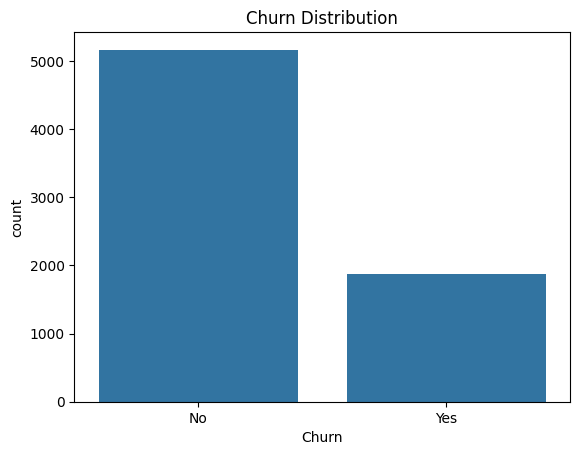

In [7]:
sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")
plt.show()

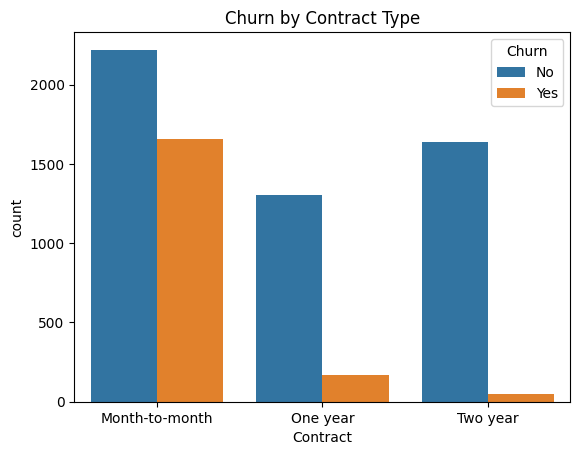

In [8]:
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title("Churn by Contract Type")
plt.show()

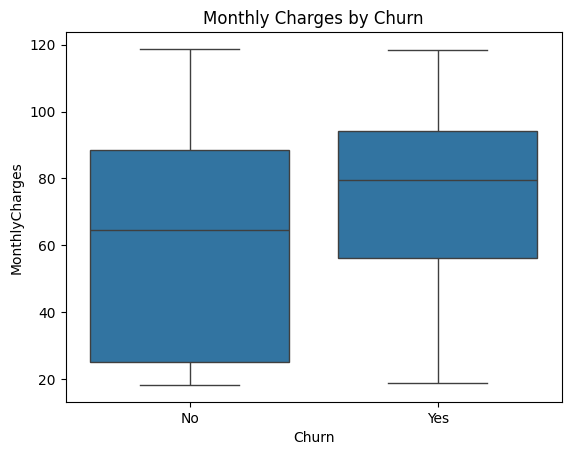

In [10]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title("Monthly Charges by Churn")
plt.show()

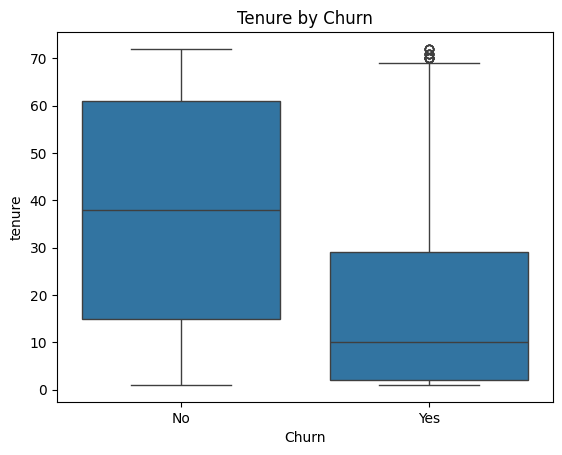

In [12]:
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title("Tenure by Churn")
plt.show()

### Data Preparation and Encoding

In [13]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True)

df.drop('customerID', axis=1, inplace=True)

In [14]:
df_encoded = pd.get_dummies(df, drop_first=True)

In [15]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('Churn_Yes', axis=1)
y = df_encoded['Churn_Yes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model 1 - Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

lr_y_pred = lr_model.predict(X_test)

print("Accuracy Score : ", accuracy_score(y_test, lr_y_pred))
print("\nConfusion Matrix : \n", confusion_matrix(y_test, lr_y_pred))
print("\nClassification Report : \n", classification_report(y_test, lr_y_pred))

Accuracy Score :  0.7867803837953091

Confusion Matrix : 
 [[919 114]
 [186 188]]

Classification Report : 
               precision    recall  f1-score   support

       False       0.83      0.89      0.86      1033
        True       0.62      0.50      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



C:\Users\Bhavesh\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Model 2 - Decision Tree

In [18]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

dt_y_pred = dt_model.predict(X_test)

print("Accuracy Score : ", accuracy_score(y_test, dt_y_pred))
print("\nConfusion Matrix : \n", confusion_matrix(y_test, dt_y_pred))
print("\nClassification Report : \n", classification_report(y_test, dt_y_pred))

Accuracy Score :  0.7249466950959488

Confusion Matrix : 
 [[825 208]
 [179 195]]

Classification Report : 
               precision    recall  f1-score   support

       False       0.82      0.80      0.81      1033
        True       0.48      0.52      0.50       374

    accuracy                           0.72      1407
   macro avg       0.65      0.66      0.66      1407
weighted avg       0.73      0.72      0.73      1407



## Model Comparison & Conclusion

- Logistic Regression provides stable and interpretable results.
- Decision Tree captures non-linear patterns and shows better recall for churned customers.
- From a business perspective, identifying churned customers is more important than overall accuracy.
